### Representacao dos Estados do Brasil em grafos

In [21]:
import pandas as pd
import numpy as np

data = pd.read_csv("Estados_.csv", index_col=0, encoding = "ISO-8859-1")
data

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Espírito Santo,Goiás,Maranhão,Mato Grosso,...,Rio de Janeiro,Rio Grande do Norte,Rio Grande do Sul,Rondônia,Roraima,Santa Catarina,São Paulo,Sergipe,Tocantins,Distrito Federal
Estados,,,,,,,,,,,,,,,,,,,,,
Acre,0,0,0.0,1,0.0,0,0,0.0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
Alagoas,0,0,0.0,0,1.0,0,0,0.0,0,0.0,...,0.0,0,0,0,0,0,0,1,0,0
Amapá,0,0,0.0,0,0.0,0,0,0.0,0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
Amazonas,1,0,0.0,0,0.0,0,0,0.0,0,1.0,...,0.0,0,0,1,1,0,0,0,0,0
Bahia,0,1,0.0,0,0.0,0,1,1.0,0,0.0,...,0.0,0,0,0,0,0,0,1,0,0
Ceará,0,0,0.0,0,0.0,0,0,0.0,0,0.0,...,0.0,1,0,0,0,0,0,0,0,0
Espírito Santo,0,0,0.0,0,1.0,0,0,0.0,0,0.0,...,1.0,0,0,0,0,0,0,0,0,0
Goiás,0,0,0.0,0,1.0,0,0,0.0,0,1.0,...,0.0,0,0,0,0,0,0,0,1,1
Maranhão,0,0,0.0,0,0.0,0,0,0.0,0,0.0,...,0.0,0,0,0,0,0,0,0,1,0


### Lista e Quantidade de vizinhos

In [17]:
estados = {}
for i in data:
    vizinhos = []
    for j in range(len(data[i])):
        if data[i][j] == 1:
            vizinhos.append(data.index[j])
            
    print("Estado: {}com {} estados vizinhos, que sao: {} \n".format(i,len(vizinhos),vizinhos))
    estados[i] = vizinhos
print(estados)

Estado: Acre com 1 estados vizinhos, que sao: ['Amazonas '] 

Estado: Alagoas com 3 estados vizinhos, que sao: ['Bahia ', 'Pernambuco ', 'Sergipe '] 

Estado: Amapa com 1 estados vizinhos, que sao: ['Para '] 

Estado: Amazonas com 5 estados vizinhos, que sao: ['Acre ', 'Mato Grosso ', 'Para ', 'Rondonia ', 'Roraima '] 

Estado: Bahia com 8 estados vizinhos, que sao: ['Alagoas ', 'Espirito Santo ', 'Goias ', 'Minas Gerais ', 'Pernambuco ', 'Piaui ', 'Sao Paulo ', 'Tocantins '] 

Estado: Ceara com 4 estados vizinhos, que sao: ['Paraiba ', 'Pernambuco ', 'Piaui ', 'Rio Grande do Norte '] 

Estado: Espirito Santo com 3 estados vizinhos, que sao: ['Bahia ', 'Minas Gerais ', 'Rio de Janeiro '] 

Estado: Goias com 6 estados vizinhos, que sao: ['Bahia ', 'Mato Grosso ', 'Mato Grosso do Sul ', 'Minas Gerais ', 'Tocantins ', 'Distrito Federal'] 

Estado: Maranhao com 3 estados vizinhos, que sao: ['Para ', 'Piaui ', 'Tocantins '] 

Estado: Mato Grosso com 6 estados vizinhos, que sao: ['Amazonas '

### Maior e menor grafo:

In [18]:
max_ = []
min_ = []

for i in estados:
    if len(min_) == 0:
        max_.append([i,len(estados[i])])
        min_.append([i,len(estados[i])])
    elif len(estados[i]) <= min_[0][1]:
        if len(estados[i]) == min_[0][1]:
            min_.append([i,len(estados[i])])
        else:
            min_ = [[i,len(estados[i])]]
    elif len(estados[i]) >= max_[0][1]:
        if len(estados[i]) == max_[0][1]:
            max_.append([i,len(estados[i])])
        else:
            max_ = [[i,len(estados[i])]]

print("O estado com mais vizinhos é:{} e o com menor é: {}".format(max_,min_))

O estado com mais vizinhos é:[['Bahia ', 8]] e o com menor é: [['Acre ', 1], ['Amapa ', 1], ['Rio Grande do Sul ', 1], ['Distrito Federal', 1]]


### O grafo é pouco denso:

In [7]:
max_[0][1]/len(estados)

0.2962962962962963

### Grafico de quantidade/frequencia

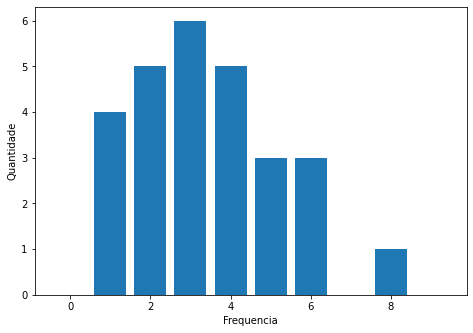

In [15]:
import matplotlib.pyplot as plt

quantidade = np.array([i for i in range((max_[0][1] + 2))])
frequancia = [0] * (max_[0][1] + 2)

for i in estados:
    frequancia[len(estados[i])] += 1


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(quantidade,frequancia)
plt.xlabel("Frequencia")
plt.ylabel("Quantidade")
plt.show()